In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics

%matplotlib inline

### Link to metadata

In [2]:
ff = pd.read_csv('comp.csv')

In [3]:
loc = ff[['location','best','excLSTM']]
loc = loc.drop_duplicates()
loc.to_csv('fliter_location.csv')
loc

,location,best,excLSTM
0,5.0,LSTM,MovAvg
1,6.0,LSTM,MovAvg
2,7.0,NaN,MovAvg
3,31.0,LSTM,SARIMA
4,62.0,NaN,MovAvg
...,...,...,...
309,1165.0,NaN,NaN
310,1119.0,LSTM,MovAvg
311,1166.0,NaN,NaN
312,1167.0,NaN,NaN


In [4]:
meta = pd.read_csv('meta/ff_locations.csv')

In [5]:
meta

,location,address,city,region,lat,lon,position,type
0,8,"Holborn Bars, 3 Holborn, London, EC1N 2LL, Gre...",London,Greater London,51.51806,-0.11111,NaN,External
1,9,"4 Gray's Inn Road, London, WC1X 8HG, Greater L...",London,Greater London,51.51825,-0.11122,NaN,External
2,10,"19-20 Great Sutton Street, London, EC1V 0DR, G...",London,Greater London,51.52329,-0.10053,NaN,Internal
3,11,"76 New Oxford Street, London, WC1A 1EU, Greate...",London,Greater London,51.51684,-0.12749,NaN,External
4,12,"18 Hammersmith Broadway, London, W6 7AB, Great...",London,Greater London,51.49340,-0.22403,NaN,External
...,...,...,...,...,...,...,...,...
1207,1216,"90-100 Edgware Road, London, W2 2EA, Greater L...",London,Greater London,51.51555,-0.16349,Tesco Metro,External
1208,1213,"9 Spring Street, London, W2 3RA, Greater London",London,Greater London,51.51458,-0.17568,Headcase,External
1209,1197,"163-165 Praed Street, London, W2 1RH, Greater ...",London,Greater London,51.51581,-0.17499,Angus Steak House,Internal
1210,1224,"75-76 High Street, Northallerton, DL7 8EG, Yor...",Northallerton,Yorkshire and the Humber,54.34196,-1.43558,Bridgfords,External


In [6]:
meta_loc = pd.merge(loc, meta, how = 'inner', on = 'location')
meta_loc

,location,best,excLSTM,address,city,region,lat,lon,position,type
0,5.0,LSTM,MovAvg,"Unit 35, Hammersmith Broadway Shopping Centre,...",London,Greater London,51.49273,-0.22426,King Street entrance,External
1,6.0,LSTM,MovAvg,"Unit 11, Hammersmith Broadway Shopping Centre,...",London,Greater London,51.49215,-0.22356,Hammersmith Underground Station - Talgarth Roa...,External
2,7.0,NaN,MovAvg,"Unit 13-16, Hammersmith Broadway Shopping Cent...",London,Greater London,51.49171,-0.22361,Talgarth Road entrance,External
3,31.0,LSTM,SARIMA,"Unit 3, Coppergate Shopping Centre, St. Marys ...",York,Yorkshire and the Humber,53.95737,-1.07965,Topshop,External
4,62.0,NaN,MovAvg,"Unit 9, Hammersmith Broadway Shopping Centre, ...",London,Greater London,51.49226,-0.22374,Bus station link corridor,External
...,...,...,...,...,...,...,...,...,...,...
308,1165.0,NaN,NaN,"40 West Street, Dorking, RH4 1BU, South East",Dorking,South East,51.23186,-0.33629,NaN,External
309,1119.0,LSTM,MovAvg,"26-28 The Moor, Sheffield, S1 4PA, Yorkshire a...",Sheffield,Yorkshire and the Humber,53.37705,-1.47288,NaN,External
310,1166.0,NaN,NaN,"149-151 Victoria Street, London, SW1E 5NH, Gre...",London,Greater London,51.49683,-0.13995,NaN,External
311,1167.0,NaN,NaN,"Unit LM08, Intu Victoria Centre, Victoria Cent...",Nottingham,East Midlands,52.95720,-1.14727,NaN,External


In [7]:
meta_loc.to_csv('loc_meta.csv')

In [8]:
#meta_london = meta_loc.loc[meta_loc.region == 'Greater London']
#meta_london

In [9]:
#meta_london.to_csv('london_meta.csv')

### Combine Roads

In [10]:
nearest_road = pd.read_csv('statistics/nearest_road.csv')
road_meta = pd.read_csv('statistics/road_meta2.csv')

E:\Anaconda3\envs\urbsim\lib\site-packages\IPython\core\interactiveshell.py:3156: DtypeWarning: Columns (20,30,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
road_meta['NEAR_FID'] = road_meta['FID']
temp = pd.merge(nearest_road, road_meta, how = 'inner', on = 'NEAR_FID')

In [12]:
loc_meta = meta_loc[['location','lat','lon','best','excLSTM','city','region']]
loc_meta

,location,lat,lon,best,excLSTM,city,region
0,5.0,51.49273,-0.22426,LSTM,MovAvg,London,Greater London
1,6.0,51.49215,-0.22356,LSTM,MovAvg,London,Greater London
2,7.0,51.49171,-0.22361,NaN,MovAvg,London,Greater London
3,31.0,53.95737,-1.07965,LSTM,SARIMA,York,Yorkshire and the Humber
4,62.0,51.49226,-0.22374,NaN,MovAvg,London,Greater London
...,...,...,...,...,...,...,...
308,1165.0,51.23186,-0.33629,NaN,NaN,Dorking,South East
309,1119.0,53.37705,-1.47288,LSTM,MovAvg,Sheffield,Yorkshire and the Humber
310,1166.0,51.49683,-0.13995,NaN,NaN,London,Greater London
311,1167.0,52.95720,-1.14727,NaN,NaN,Nottingham,East Midlands


In [ ]:
plt.figure(figsize = (12,4))
loc_meta.loc[loc_meta.excLSTM == 'SARIMA']['nearest_roads'].hist(label = 'SARIMA', bins = 20)

plt.legend(loc = 'best')

In [13]:
plt.figure(figsize = (12,4))
loc_meta.loc[loc_meta.excLSTM == 'MovAvg']['nearest_roads'].hist(label = 'MovAvg', bins = 20)
plt.legend(loc = 'best')

KeyError: 'nearest_roads'

<Figure size 864x288 with 0 Axes>

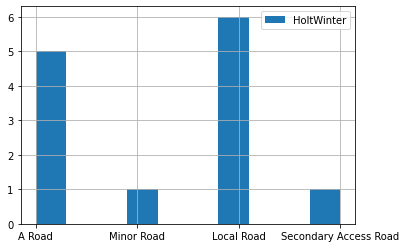

In [33]:
loc_meta.loc[loc_meta.excLSTM == 'HoltWinter']['nearest_roads'].hist(label = 'HoltWinter')
plt.legend(loc = 'best')

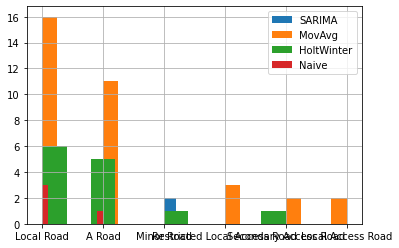

In [47]:
loc_meta.loc[loc_meta.excLSTM == 'SARIMA']['nearest_roads'].hist(label = 'SARIMA', bins = 20)
loc_meta.loc[loc_meta.excLSTM == 'MovAvg']['nearest_roads'].hist(label = 'MovAvg', bins = 20)
loc_meta.loc[loc_meta.excLSTM == 'HoltWinter']['nearest_roads'].hist(label = 'HoltWinter')
loc_meta.loc[loc_meta.excLSTM == 'Naive']['nearest_roads'].hist(label = 'Naive')
plt.legend(loc = 'best')

In [35]:
loc_meta.groupby('excLSTM')['nearest_roads'].count()

excLSTM
              56
HoltWinter    13
MovAvg        35
Naive          4
SARIMA        16
Name: nearest_roads, dtype: int64

In [ ]:
fig,ax = plt.subplots()
ax.bar(labels, men_means,width,yerr=men_std,label='Men')
ax.bar(labels,women_means,width,yerr=women_std,bottom=men_means,label='Women')

### Combine Road Part 2 :

In [13]:
loc_A_Road = pd.read_csv('statistics2/dist_a_road.csv')
loc_B_Road = pd.read_csv('statistics2/dist_b_road.csv')
loc_Local_Access_Road = pd.read_csv('statistics2/dist_local_access_road.csv')
loc_Local_Road = pd.read_csv('statistics2/dist_local_road.csv')
loc_Minor_Road = pd.read_csv('statistics2/dist_minor_road.csv')
loc_Motorway = pd.read_csv('statistics2/dist_motorway.csv')
loc_Restricted_Local_Access_Road = pd.read_csv('statistics2/dist_restricted_local_access_road.csv')
loc_Secondary_Access_Road = pd.read_csv('statistics2/dist_secondary_access_road.csv')

In [14]:
loc_meta['dist_A'] = loc_A_Road['NEAR_DIST'] * 1000
loc_meta['dist_B'] = loc_B_Road['NEAR_DIST'] * 1000
loc_meta['dist_Minor'] = loc_Minor_Road['NEAR_DIST'] * 1000

loc_meta['dist_Local'] = loc_Local_Road['NEAR_DIST'] * 1000
loc_meta['dist_Local_Access'] = loc_Local_Access_Road['NEAR_DIST'] * 1000
loc_meta['dist_Sec_Access'] = loc_Secondary_Access_Road['NEAR_DIST'] * 1000
loc_meta['dist_Res_Local_Access'] = loc_Restricted_Local_Access_Road['NEAR_DIST'] * 1000

loc_meta['dist_Motorway'] = loc_Motorway['NEAR_DIST'] * 1000

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
loc_roads = loc_meta
loc_roads[['best','excLSTM']] = meta_loc[['best','excLSTM']]
loc_roads = pd.merge(loc_roads,meta_loc[['location','address','position']], how = 'left', on = 'location')
loc_roads = loc_roads.drop_duplicates()
loc_roads

,location,lat,lon,best,excLSTM,city,region,dist_A,dist_B,dist_Minor,dist_Local,dist_Local_Access,dist_Sec_Access,dist_Res_Local_Access,dist_Motorway,address,position
0,5.0,51.49273,-0.22426,LSTM,MovAvg,London,Greater London,0.249989,8.183310,15.845292,0.343351,9.119249,7.121891,1.672632,52.418194,"Unit 35, Hammersmith Broadway Shopping Centre,...",King Street entrance
1,6.0,51.49215,-0.22356,LSTM,MovAvg,London,Greater London,0.283125,8.971344,15.829665,0.085263,8.733550,6.263092,0.841378,53.081041,"Unit 11, Hammersmith Broadway Shopping Centre,...",Hammersmith Underground Station - Talgarth Roa...
2,7.0,51.49171,-0.22361,NaN,MovAvg,London,Greater London,0.087891,9.018724,15.868603,0.333934,8.434502,5.912387,0.958705,53.008327,"Unit 13-16, Hammersmith Broadway Shopping Cent...",Talgarth Road entrance
3,31.0,53.95737,-1.07965,LSTM,SARIMA,York,Yorkshire and the Humber,3.247845,0.553040,5.278809,0.121614,0.236689,4.025079,1.635080,266.975816,"Unit 3, Coppergate Shopping Centre, St. Marys ...",Topshop
4,62.0,51.49226,-0.22374,NaN,MovAvg,London,Greater London,0.154238,8.773683,15.859061,0.231139,8.933722,6.448961,1.034977,52.907605,"Unit 9, Hammersmith Broadway Shopping Centre, ...",Bus station link corridor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,1165.0,51.23186,-0.33629,NaN,NaN,Dorking,South East,0.706797,18.399462,2.462160,0.710049,4.234687,1.240187,0.349980,69.181865,"40 West Street, Dorking, RH4 1BU, South East",NaN
309,1119.0,53.37705,-1.47288,LSTM,MovAvg,Sheffield,Yorkshire and the Humber,4.399493,4.511111,0.104293,0.342072,3.950180,4.153272,1.147149,73.129669,"26-28 The Moor, Sheffield, S1 4PA, Yorkshire a...",NaN
310,1166.0,51.49683,-0.13995,NaN,NaN,London,Greater London,0.390717,2.756812,5.359857,0.872419,2.018043,7.524002,1.407306,114.100603,"149-151 Victoria Street, London, SW1E 5NH, Gre...",NaN
311,1167.0,52.95720,-1.14727,NaN,NaN,Nottingham,East Midlands,0.046799,2.082259,2.395461,0.240229,1.085291,8.509200,3.145691,90.415061,"Unit LM08, Intu Victoria Centre, Victoria Cent...",NaN


In [16]:
loc_roads.to_csv('loc_roads.csv')

KeyError: 'nearest_roads'

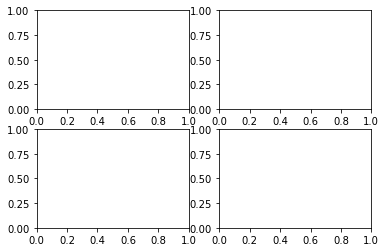

In [28]:
fig,axs = plt.subplots(2,2)

loc_meta.loc[loc_meta.excLSTM == 'SARIMA']['nearest_roads'].hist(figsize = (18,6), label = 'SARIMA', bins = 20, ax = axs[(0,0)])
loc_meta.loc[loc_meta.excLSTM == 'MovAvg']['nearest_roads'].hist(label = 'MovAvg', bins = 20, ax = axs[(0,1)])
loc_meta.loc[loc_meta.excLSTM == 'HoltWinter']['nearest_roads'].hist(label = 'HoltWinter',bins = 20, ax = axs[(1,0)])
loc_meta.loc[loc_meta.excLSTM == 'Naive']['nearest_roads'].hist(label = 'Naive',bins = 20, ax = axs[(1,1)])

plt.legend(loc = 'best')

In [17]:
col = ['excLSTM', 'dist_A', 'dist_B', 'dist_Minor', 'dist_Local', 'dist_Local_Access', 'dist_Sec_Access', 
       'dist_Res_Local_Access' ,'dist_Motorway']

In [18]:
col2 = ['best', 'dist_A', 'dist_B', 'dist_Minor', 'dist_Local', 'dist_Local_Access', 'dist_Sec_Access', 
       'dist_Res_Local_Access' ,'dist_Motorway']

In [19]:
loc_roads = loc_roads.loc[(loc_roads.location != 1124) & (loc_roads.location != 1105)]

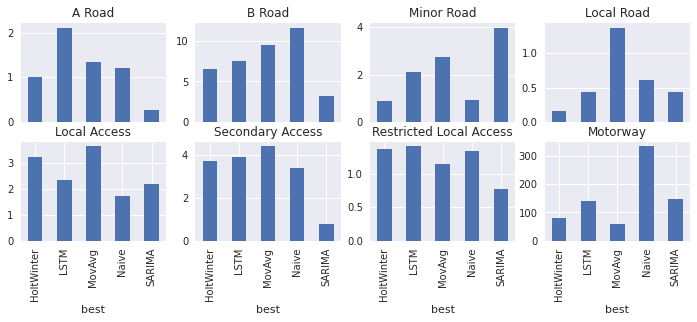

In [104]:
fig,axs = plt.subplots(2,4)

loc_roads[col2].groupby('best').mean()['dist_A']\
.plot(figsize=(12,4),title = 'A Road', kind='bar',ax = axs[(0,0)]).xaxis.set_visible(False)

loc_roads[col2].groupby('best').mean()['dist_B']\
.plot(kind='bar',title = 'B Road',ax = axs[(0,1)]).xaxis.set_visible(False)

loc_roads[col2].groupby('best').mean()['dist_Minor']\
.plot(kind='bar',title = 'Minor Road',ax = axs[(0,2)]).xaxis.set_visible(False)

loc_roads[col2].groupby('best').mean()['dist_Local']\
.plot(kind='bar',title = 'Local Road',ax = axs[(0,3)]).xaxis.set_visible(False)

loc_roads[col2].groupby('best').mean()['dist_Local_Access']\
.plot(kind='bar',title = 'Local Access',ax = axs[(1,0)])

loc_roads[col2].groupby('best').mean()['dist_Sec_Access']\
.plot(kind='bar',title = 'Secondary Access',ax = axs[(1,1)])

loc_roads[col2].groupby('best').mean()['dist_Res_Local_Access']\
.plot(kind='bar',title = 'Restricted Local Access',ax = axs[(1,2)])

loc_roads[col2].groupby('best').mean()['dist_Motorway']\
.plot(kind='bar',title = 'Motorway',ax = axs[(1,3)], )

plt.style.use('default')
plt.show()

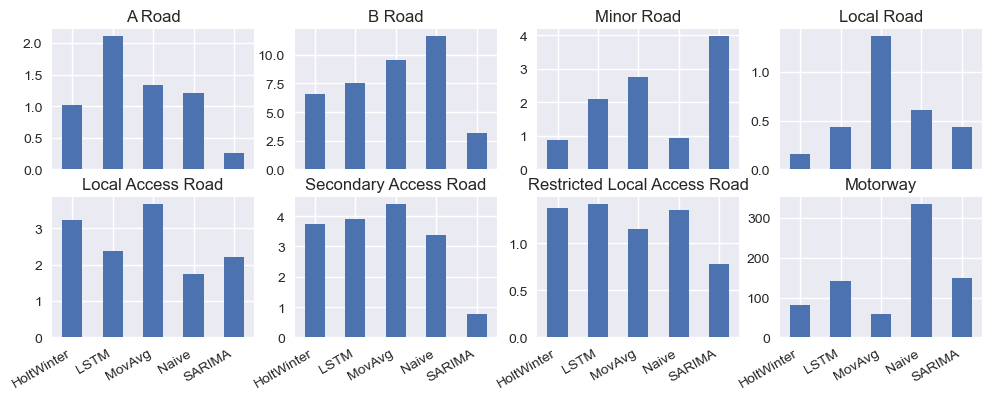

In [111]:
fig,axs = plt.subplots(2,4)

loc_roads[col2].groupby('best').mean()['dist_A']\
.plot(figsize=(12,4),title = 'A Road', kind='bar',ax = axs[(0,0)]).set_xticklabels(['']*5)
axs[(0,0)].set_xlabel('')

loc_roads[col2].groupby('best').mean()['dist_B']\
.plot(kind='bar',title = 'B Road',ax = axs[(0,1)]).set_xticklabels(['']*5)
axs[(0,1)].set_xlabel('')

loc_roads[col2].groupby('best').mean()['dist_Minor']\
.plot(kind='bar',title = 'Minor Road',ax = axs[(0,2)]).set_xticklabels(['']*5)
axs[(0,2)].set_xlabel('')

loc_roads[col2].groupby('best').mean()['dist_Local']\
.plot(kind='bar',title = 'Local Road',ax = axs[(0,3)]).set_xticklabels(['']*5)
axs[(0,3)].set_xlabel('')

loc_roads[col2].groupby('best').mean()['dist_Local_Access']\
.plot(kind='bar',title = 'Local Access Road',ax = axs[(1,0)]).set_xlabel('')

loc_roads[col2].groupby('best').mean()['dist_Sec_Access']\
.plot(kind='bar',title = 'Secondary Access Road',ax = axs[(1,1)]).set_xlabel('')

loc_roads[col2].groupby('best').mean()['dist_Res_Local_Access']\
.plot(kind='bar',title = 'Restricted Local Access Road',ax = axs[(1,2)]).set_xlabel('')

loc_roads[col2].groupby('best').mean()['dist_Motorway']\
.plot(kind='bar',title = 'Motorway',ax = axs[(1,3)], ).set_xlabel('')
axs[(1,0)].set_xticklabels(axs[(1,0)].get_xticklabels(), rotation=30, ha='right')
axs[(1,1)].set_xticklabels(axs[(1,1)].get_xticklabels(), rotation=30, ha='right')
axs[(1,2)].set_xticklabels(axs[(1,2)].get_xticklabels(), rotation=30, ha='right')
axs[(1,3)].set_xticklabels(axs[(1,3)].get_xticklabels(), rotation=30, ha='right')
plt.style.use('seaborn')
plt.show()

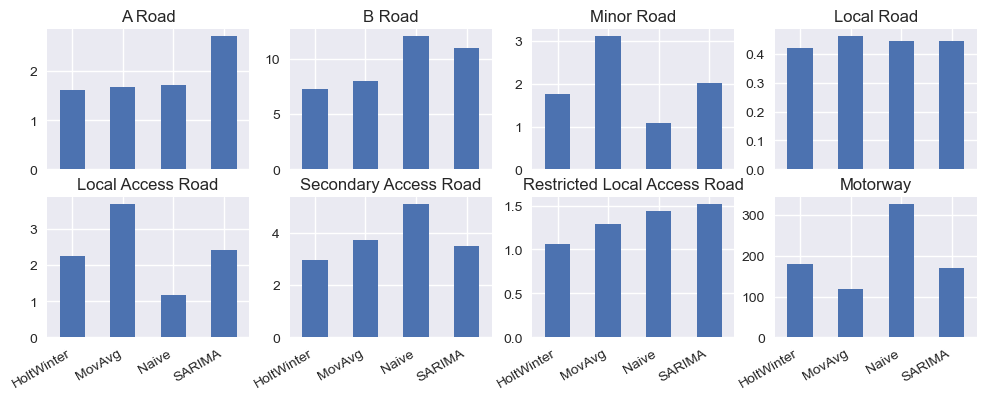

In [110]:
fig,axs = plt.subplots(2,4)

loc_roads[col].groupby('excLSTM').mean()['dist_A']\
.plot(figsize=(12,4),title = 'A Road', kind='bar',ax = axs[(0,0)]).set_xticklabels(['']*4)
axs[(0,0)].set_xlabel('')

loc_roads[col].groupby('excLSTM').mean()['dist_B']\
.plot(kind='bar',title = 'B Road',ax = axs[(0,1)]).set_xticklabels(['']*4)
axs[(0,1)].set_xlabel('')

loc_roads[col].groupby('excLSTM').mean()['dist_Minor']\
.plot(kind='bar',title = 'Minor Road',ax = axs[(0,2)]).set_xticklabels(['']*4)
axs[(0,2)].set_xlabel('')

loc_roads[col].groupby('excLSTM').mean()['dist_Local']\
.plot(kind='bar',title = 'Local Road',ax = axs[(0,3)]).set_xticklabels(['']*4)
axs[(0,3)].set_xlabel('')

loc_roads[col].groupby('excLSTM').mean()['dist_Local_Access']\
.plot(kind='bar',title = 'Local Access Road',ax = axs[(1,0)]).set_xlabel('')
axs[(1,0)].set_xticklabels(axs[(1,0)].get_xticklabels(), rotation=30, ha='right')
loc_roads[col].groupby('excLSTM').mean()['dist_Sec_Access']\
.plot(kind='bar',title = 'Secondary Access Road',ax = axs[(1,1)]).set_xlabel('')
axs[(1,1)].set_xticklabels(axs[(1,1)].get_xticklabels(), rotation=30, ha='right')
loc_roads[col].groupby('excLSTM').mean()['dist_Res_Local_Access']\
.plot(kind='bar',title = 'Restricted Local Access Road',ax = axs[(1,2)]).set_xlabel('')
axs[(1,2)].set_xticklabels(axs[(1,2)].get_xticklabels(), rotation=30, ha='right')
loc_roads[col].groupby('excLSTM').mean()['dist_Motorway']\
.plot(kind='bar',title = 'Motorway',ax = axs[(1,3)], ).set_xlabel('')
axs[(1,3)].set_xticklabels(axs[(1,3)].get_xticklabels(), rotation=30, ha='right')

plt.style.use('seaborn')
plt.show()

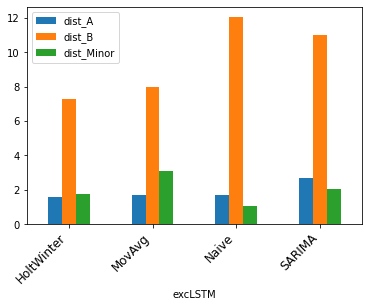

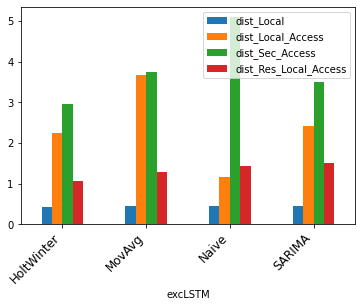

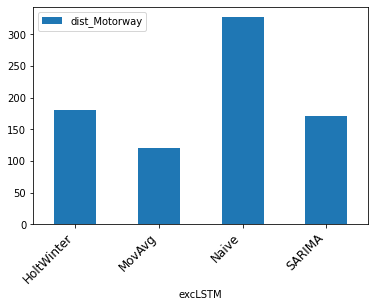

In [33]:
loc_roads[col].groupby('excLSTM')\
.mean()[['dist_A', 'dist_B', 'dist_Minor']].plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

loc_roads[col].groupby('excLSTM')\
.mean()[['dist_Local', 'dist_Local_Access', 'dist_Sec_Access', 
       'dist_Res_Local_Access']].plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

loc_roads[col].groupby('excLSTM')\
.mean()[['dist_Motorway']].plot(kind='bar')

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

## Land Use

In [20]:
loc_OAC = pd.read_csv('statistics2/UK_OAC.csv')
loc_landuse = pd.merge(loc_roads, loc_OAC, how = 'inner', on = 'location')

In [21]:
for i in range(len(loc_landuse['SPRGRP'])): 
    if loc_landuse['SPRGRP'][i] == 1:
        loc_landuse['SPRGRP'][i] = 'Rural residents'
    elif loc_landuse['SPRGRP'][i] == 2:
        loc_landuse['SPRGRP'][i] = 'Comsopolitans'
    elif loc_landuse['SPRGRP'][i] == 3:
        loc_landuse['SPRGRP'][i] = 'Ethnicity central'
    elif loc_landuse['SPRGRP'][i] == 4:
        loc_landuse['SPRGRP'][i] = 'Multicultural metropolitans'
    elif loc_landuse['SPRGRP'][i] == 5:
        loc_landuse['SPRGRP'][i] = 'Urbanites'
    elif loc_landuse['SPRGRP'][i] == 6:
        loc_landuse['SPRGRP'][i] = 'Suburbanites'
    elif loc_landuse['SPRGRP'][i] == 7:
        loc_landuse['SPRGRP'][i] = 'Constrained city dwellers'
    elif loc_landuse['SPRGRP'][i] == 8:
        loc_landuse['SPRGRP'][i] = 'Hard-pressed living'

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
E:\Anaconda3\envs\urbsim\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
E:\Anaconda3\envs\urbsim\lib

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  """
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # This is added back by InteractiveShellApp.init_path()
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecate

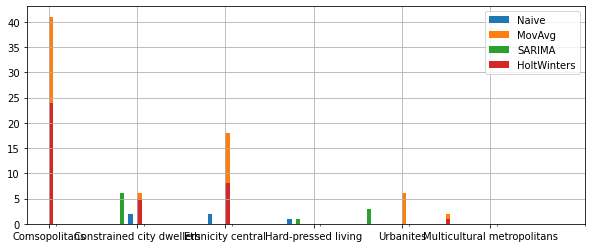

In [22]:
x = np.arange(7)
width = 0.05

loc_landuse.loc[loc_landuse.excLSTM_x == 'Naive']['SPRGRP'].hist(figsize = (10,4),label = 'Naive', width = width).\
set_xticks(x - 1.5*width * 2, width)

loc_landuse.loc[loc_landuse.excLSTM_x == 'MovAvg']['SPRGRP'].hist(label = 'MovAvg', width = width).\
set_xticks(x - 0.5*width, width)

loc_landuse.loc[loc_landuse.excLSTM_x == 'SARIMA']['SPRGRP'].hist(label = 'SARIMA', width = width).\
set_xticks(x + 0.5* width, width)

loc_landuse.loc[loc_landuse.excLSTM_x == 'HoltWinter']['SPRGRP'].hist(label = 'HoltWinters', width = width).\
set_xticks(x + 1.5*width, width)

plt.legend(loc = 'best')

array([[<AxesSubplot:title={'center':'excLSTM_x'}>]], dtype=object)

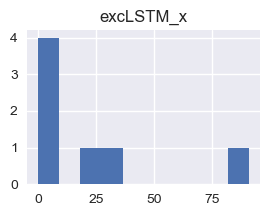

In [166]:

#plt.style.use('seaborn')
loc_landuse[['excLSTM_x','SPRGRP']].groupby('SPRGRP').count().hist(figsize = (3,2))



[Text(0, 0, 'Comsopolitans'),
 Text(1, 0, 'Constrained city dwellers'),
 Text(2, 0, 'Ethnicity central'),
 Text(3, 0, 'Multicultural metropolitans')]

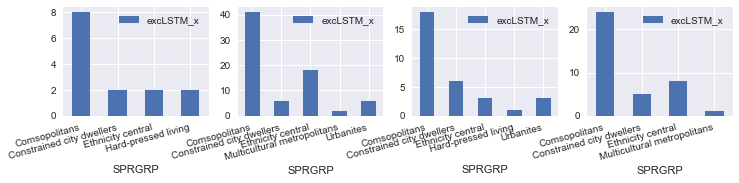

In [93]:
fig,axs = plt.subplots(1,4)
plt.style.use('seaborn')
loc_landuse.loc[loc_landuse.excLSTM_x == 'Naive'][['excLSTM_x','SPRGRP']].groupby('SPRGRP').count().plot.\
bar(figsize = (12,2),ax = axs[(0)]).set_xticklabels(axs[(0)].get_xticklabels(),rotation=15, ha='right')

loc_landuse.loc[loc_landuse.excLSTM_x == 'MovAvg'][['excLSTM_x','SPRGRP']].groupby('SPRGRP').count().plot.\
bar(ax = axs[(1)]).set_xticklabels(axs[(1)].get_xticklabels(),rotation=15, ha='right')

loc_landuse.loc[loc_landuse.excLSTM_x == 'SARIMA'][['excLSTM_x','SPRGRP']].groupby('SPRGRP').count().plot.\
bar(ax = axs[(2)]).set_xticklabels(axs[(2)].get_xticklabels(),rotation=15, ha='right')

loc_landuse.loc[loc_landuse.excLSTM_x == 'HoltWinter'][['excLSTM_x','SPRGRP']].groupby('SPRGRP').count().plot.\
bar(ax = axs[(3)]).set_xticklabels(axs[(3)].get_xticklabels(),rotation=15, ha='right')



Text(0.5, 0, '')

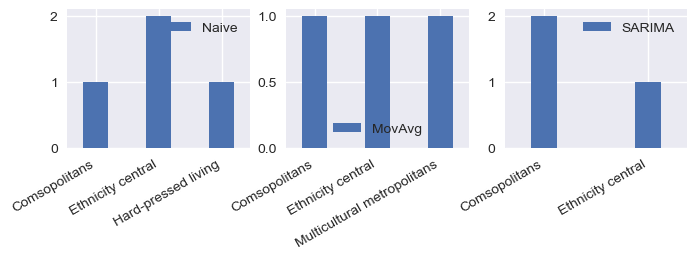

In [173]:
fig,axs = plt.subplots(1,3)
plt.style.use('seaborn')

loc_landuse.loc[loc_landuse.best == 'Naive'][['best','SPRGRP']].groupby('SPRGRP').count().plot.\
bar(figsize = (8,1.8),ax = axs[(0)],width = 0.4).set_xticklabels(axs[(0)].get_xticklabels(),rotation=30, ha='right')
axs[(0)].legend().get_texts()[0].set_text('Naive')
axs[0].set_xlabel('')

loc_landuse.loc[loc_landuse.best== 'MovAvg'][['best','SPRGRP']].groupby('SPRGRP').count().plot.\
bar(ax = axs[(1)],width = 0.4).set_xticklabels(axs[(1)].get_xticklabels(),rotation=30, ha='right')
axs[(1)].legend().get_texts()[0].set_text('MovAvg')
axs[1].set_xlabel('')

loc_landuse.loc[loc_landuse.best == 'SARIMA'][['best','SPRGRP']].groupby('SPRGRP').count().plot.\
bar(ax = axs[(2)],width = 0.25).set_xticklabels(axs[(2)].get_xticklabels(),rotation=30, ha='right')
axs[(2)].legend().get_texts()[0].set_text('SARIMA')
axs[2].set_xlabel('')

Text(0.5, 0, '')

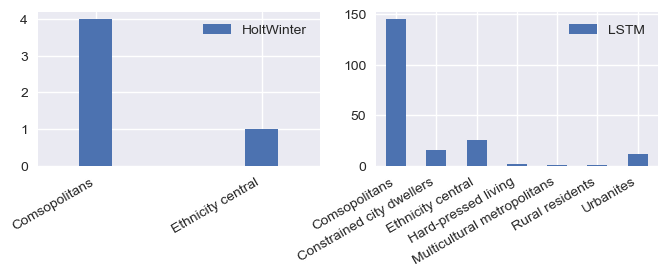

In [168]:
fig,axs = plt.subplots(1,2)
plt.style.use('seaborn')

loc_landuse.loc[loc_landuse.best == 'HoltWinter'][['best','SPRGRP']].groupby('SPRGRP').count().plot.\
bar(ax = axs[(0)],width = 0.2).set_xticklabels(axs[(0)].get_xticklabels(),rotation=30, ha='right')
axs[(0)].legend().get_texts()[0].set_text('HoltWinter')
axs[0].set_xlabel('')

loc_landuse.loc[loc_landuse.best == 'LSTM'][['best','SPRGRP']].groupby('SPRGRP').count().plot.\
bar(figsize = (8,2),ax = axs[(1)]).set_xticklabels(axs[(1)].get_xticklabels(),rotation=30, ha='right')
axs[(1)].legend().get_texts()[0].set_text('LSTM')
axs[1].set_xlabel('')


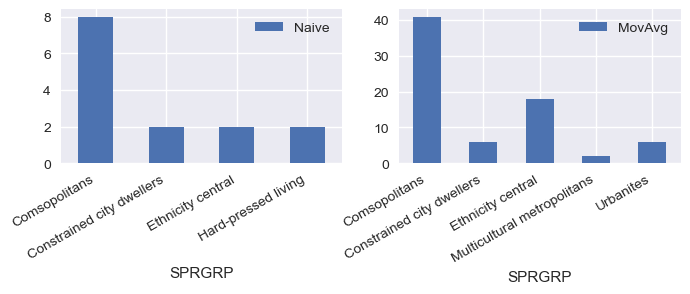

In [120]:
fig,axs = plt.subplots(1,2)
plt.style.use('seaborn')

loc_landuse.loc[loc_landuse.excLSTM_x == 'Naive'][['excLSTM_x','SPRGRP']].groupby('SPRGRP').count().plot.\
bar(figsize = (8,2),ax = axs[(0)]).set_xticklabels(axs[(0)].get_xticklabels(),rotation=30, ha='right')
axs[(0)].legend().get_texts()[0].set_text('Naive')

loc_landuse.loc[loc_landuse.excLSTM_x == 'MovAvg'][['excLSTM_x','SPRGRP']].groupby('SPRGRP').count().plot.\
bar(ax = axs[(1)]).set_xticklabels(axs[(1)].get_xticklabels(),rotation=30, ha='right')
axs[(1)].legend().get_texts()[0].set_text('MovAvg')


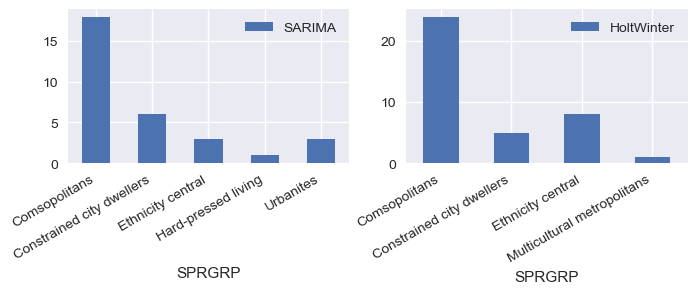

In [122]:
fig,axs = plt.subplots(1,2)
plt.style.use('seaborn')

loc_landuse.loc[loc_landuse.excLSTM_x == 'SARIMA'][['excLSTM_x','SPRGRP']].groupby('SPRGRP').count().plot.\
bar(figsize = (8,2),ax = axs[(0)]).set_xticklabels(axs[(0)].get_xticklabels(),rotation=30, ha='right')

loc_landuse.loc[loc_landuse.excLSTM_x == 'HoltWinter'][['excLSTM_x','SPRGRP']].groupby('SPRGRP').count().plot.\
bar(ax = axs[(1)]).set_xticklabels(axs[(1)].get_xticklabels(),rotation=30, ha='right')

axs[(0)].legend().get_texts()[0].set_text('SARIMA')
axs[(1)].legend().get_texts()[0].set_text('HoltWinter')

## Modelling Best Mothod through Random Forest Classifer

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [24]:
loc_roads = pd.read_csv('loc_roads.csv')
loc_roads = loc_roads.drop('Unnamed: 0', axis =1)
loc_roads.head()

,location,lat,lon,best,excLSTM,city,region,dist_A,dist_B,dist_Minor,dist_Local,dist_Local_Access,dist_Sec_Access,dist_Res_Local_Access,dist_Motorway,address,position
0,5.0,51.49273,-0.22426,LSTM,MovAvg,London,Greater London,0.249989,8.183310,15.845292,0.343351,9.119249,7.121891,1.672632,52.418194,"Unit 35, Hammersmith Broadway Shopping Centre,...",King Street entrance
1,6.0,51.49215,-0.22356,LSTM,MovAvg,London,Greater London,0.283125,8.971344,15.829665,0.085263,8.733550,6.263092,0.841378,53.081041,"Unit 11, Hammersmith Broadway Shopping Centre,...",Hammersmith Underground Station - Talgarth Roa...
2,7.0,51.49171,-0.22361,NaN,MovAvg,London,Greater London,0.087891,9.018724,15.868603,0.333934,8.434502,5.912387,0.958705,53.008327,"Unit 13-16, Hammersmith Broadway Shopping Cent...",Talgarth Road entrance
3,31.0,53.95737,-1.07965,LSTM,SARIMA,York,Yorkshire and the Humber,3.247845,0.553040,5.278809,0.121614,0.236689,4.025079,1.635080,266.975816,"Unit 3, Coppergate Shopping Centre, St. Marys ...",Topshop
4,62.0,51.49226,-0.22374,NaN,MovAvg,London,Greater London,0.154238,8.773683,15.859061,0.231139,8.933722,6.448961,1.034977,52.907605,"Unit 9, Hammersmith Broadway Shopping Centre, ...",Bus station link corridor


In [25]:
temp = pd.read_csv('loc_district.csv')
temp = temp[['location','DISTRICT']]
loc_roads = pd.merge(loc_roads, temp, how = 'inner', on = 'location')
loc_roads = loc_roads.drop_duplicates()
loc_roads

,location,lat,lon,best,excLSTM,city,region,dist_A,dist_B,dist_Minor,dist_Local,dist_Local_Access,dist_Sec_Access,dist_Res_Local_Access,dist_Motorway,address,position,DISTRICT
0,5.0,51.49273,-0.22426,LSTM,MovAvg,London,Greater London,0.249989,8.183310,15.845292,0.343351,9.119249,7.121891,1.672632,52.418194,"Unit 35, Hammersmith Broadway Shopping Centre,...",King Street entrance,Hammersmith and Fulham
1,6.0,51.49215,-0.22356,LSTM,MovAvg,London,Greater London,0.283125,8.971344,15.829665,0.085263,8.733550,6.263092,0.841378,53.081041,"Unit 11, Hammersmith Broadway Shopping Centre,...",Hammersmith Underground Station - Talgarth Roa...,Hammersmith and Fulham
2,7.0,51.49171,-0.22361,NaN,MovAvg,London,Greater London,0.087891,9.018724,15.868603,0.333934,8.434502,5.912387,0.958705,53.008327,"Unit 13-16, Hammersmith Broadway Shopping Cent...",Talgarth Road entrance,Hammersmith and Fulham
3,62.0,51.49226,-0.22374,NaN,MovAvg,London,Greater London,0.154238,8.773683,15.859061,0.231139,8.933722,6.448961,1.034977,52.907605,"Unit 9, Hammersmith Broadway Shopping Centre, ...",Bus station link corridor,Hammersmith and Fulham
4,78.0,51.49255,-0.22395,LSTM,MovAvg,London,Greater London,0.156842,8.516844,15.774605,0.331833,9.208406,6.805659,1.317535,52.715687,"Unit 3, Hammersmith Broadway Shopping Centre, ...",Hammersmith Underground Station - King Street ...,Hammersmith and Fulham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1026.0,51.51364,-0.17934,HoltWinter,HoltWinter,London,Greater London,3.262081,1.103694,2.121907,0.091332,5.105713,1.635473,1.945128,74.574577,"40-42 Craven Road, London, W2 3QA, Greater London",NaN,City of Westminster
120,1115.0,51.57751,-0.22439,LSTM,MovAvg,London,Greater London,1.784739,4.759331,0.986253,0.165188,0.129322,2.837775,2.926707,5.754745,"Unit 31, Brent Cross Shopping Centre, Prince C...",NaN,Barnet
121,1116.0,51.51298,-0.30313,NaN,NaN,London,Greater London,0.304971,0.519741,0.329524,1.737113,1.042465,2.502948,0.792413,22.177148,"Unit kiosk 2, Ealing Broadway Shopping Centre,...",NaN,Ealing
122,1117.0,51.40707,-0.02797,LSTM,HoltWinter,Beckenham,Greater London,1.095582,4.615151,1.129827,0.183936,0.771501,0.175971,1.311650,139.559269,"184 High Street, Beckenham, BR3 1EN, Greater L...",NaN,Bromley


In [26]:
loc_OAC = pd.read_csv('statistics2/UK_OAC.csv')[['location','POPULATION','SPRGRP','GRP','SUBGRP']]
loc_roads = pd.merge(loc_roads, loc_OAC, how = 'inner', on = 'location')

In [27]:
for i in range(len(loc_roads['SPRGRP'])): 
    if loc_roads['SPRGRP'][i] == 1:
        loc_roads['SPRGRP'][i] = 'Rural residents'
    elif loc_roads['SPRGRP'][i] == 2:
        loc_roads['SPRGRP'][i] = 'Comsopolitans'
    elif loc_roads['SPRGRP'][i] == 3:
        loc_roads['SPRGRP'][i] = 'Ethnicity central'
    elif loc_roads['SPRGRP'][i] == 4:
        loc_roads['SPRGRP'][i] = 'Multicultural metropolitans'
    elif loc_roads['SPRGRP'][i] == 5:
        loc_roads['SPRGRP'][i] = 'Urbanites'
    elif loc_roads['SPRGRP'][i] == 6:
        loc_roads['SPRGRP'][i] = 'Suburbanites'
    elif loc_roads['SPRGRP'][i] == 7:
        loc_roads['SPRGRP'][i] = 'Constrained city dwellers'
    elif loc_roads['SPRGRP'][i] == 8:
        loc_roads['SPRGRP'][i] = 'Hard-pressed living'
        
loc_roads.head()

E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
E:\Anaconda3\envs\urbsim\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
E:\Anaconda3\envs\urbsim\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
E:\Anaconda3\envs\urbsim\lib

,location,lat,lon,best,excLSTM,city,region,dist_A,dist_B,dist_Minor,...,dist_Sec_Access,dist_Res_Local_Access,dist_Motorway,address,position,DISTRICT,POPULATION,SPRGRP,GRP,SUBGRP
0,5.0,51.49273,-0.22426,LSTM,MovAvg,London,Greater London,0.249989,8.183310,15.845292,...,7.121891,1.672632,52.418194,"Unit 35, Hammersmith Broadway Shopping Centre,...",King Street entrance,Hammersmith and Fulham,344.0,Ethnicity central,3d,3d1
1,6.0,51.49215,-0.22356,LSTM,MovAvg,London,Greater London,0.283125,8.971344,15.829665,...,6.263092,0.841378,53.081041,"Unit 11, Hammersmith Broadway Shopping Centre,...",Hammersmith Underground Station - Talgarth Roa...,Hammersmith and Fulham,344.0,Ethnicity central,3d,3d1
2,7.0,51.49171,-0.22361,NaN,MovAvg,London,Greater London,0.087891,9.018724,15.868603,...,5.912387,0.958705,53.008327,"Unit 13-16, Hammersmith Broadway Shopping Cent...",Talgarth Road entrance,Hammersmith and Fulham,344.0,Ethnicity central,3d,3d1
3,62.0,51.49226,-0.22374,NaN,MovAvg,London,Greater London,0.154238,8.773683,15.859061,...,6.448961,1.034977,52.907605,"Unit 9, Hammersmith Broadway Shopping Centre, ...",Bus station link corridor,Hammersmith and Fulham,344.0,Ethnicity central,3d,3d1
4,78.0,51.49255,-0.22395,LSTM,MovAvg,London,Greater London,0.156842,8.516844,15.774605,...,6.805659,1.317535,52.715687,"Unit 3, Hammersmith Broadway Shopping Centre, ...",Hammersmith Underground Station - King Street ...,Hammersmith and Fulham,344.0,Ethnicity central,3d,3d1


In [28]:
missing_ratio = pd.read_csv('missing_ratio.csv')

In [29]:
missing_ratio

,location,footfall_x,footfall_y,train missing ratio,test missing ratio
0,5.0,0.856902,1.0,0.143098,0.0
1,6.0,0.851852,1.0,0.148148,0.0
2,7.0,0.856902,1.0,0.143098,0.0
3,31.0,0.964646,1.0,0.035354,0.0
4,54.0,0.656566,1.0,0.343434,0.0
...,...,...,...,...,...
406,1216.0,0.112795,1.0,0.887205,0.0
407,1217.0,0.102694,1.0,0.897306,0.0
408,1218.0,0.094276,1.0,0.905724,0.0
409,1221.0,0.069024,1.0,0.930976,0.0


In [30]:
loc_roads = pd.merge(loc_roads, missing_ratio[['location','train missing ratio','test missing ratio']],
                     how = 'inner', on = 'location')

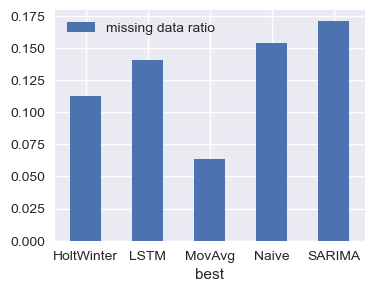

In [194]:
loc_roads[['train missing ratio','best']].groupby('best').mean().plot.bar(figsize = (4,3)).\
set_xticklabels(plt.gca().get_xticklabels(),rotation=0, ha='center')
plt.legend().get_texts()[0].set_text('missing data ratio')

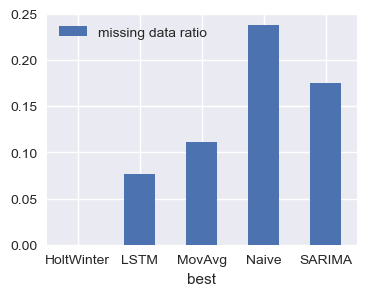

In [195]:
loc_roads[['test missing ratio','best']].groupby('best').mean().plot.bar(figsize = (4,3)).\
set_xticklabels(plt.gca().get_xticklabels(),rotation=0, ha='center')
plt.legend().get_texts()[0].set_text('missing data ratio')

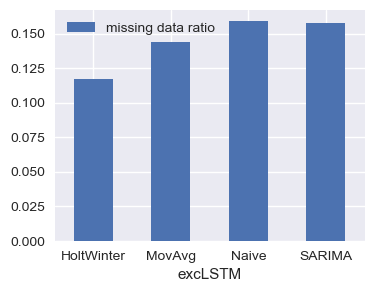

In [196]:
loc_roads[['train missing ratio','excLSTM']].groupby('excLSTM').mean().plot.bar(figsize = (4,3)).\
set_xticklabels(plt.gca().get_xticklabels(),rotation=0, ha='center')
plt.legend().get_texts()[0].set_text('missing data ratio')

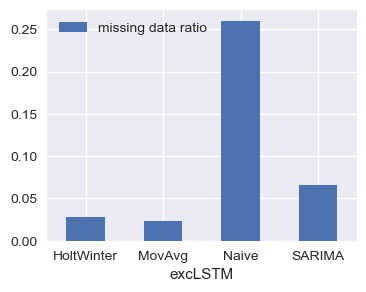

In [197]:
loc_roads[['test missing ratio','excLSTM']].groupby('excLSTM').mean().plot.bar(figsize = (4,3)).\
set_xticklabels(plt.gca().get_xticklabels(),rotation=0, ha='center')
plt.legend().get_texts()[0].set_text('missing data ratio')

### 1. Modelling Methods exclude LSTM

In [78]:
plt.style.use('default')

In [31]:
loc_excLSTM = loc_roads.drop('best', axis = 1)
loc_excLSTM = loc_excLSTM[~loc_excLSTM['excLSTM'].isin([' '])]
loc_excLSTM = loc_excLSTM.reset_index(drop=True)
loc_excLSTM.head()

,location,lat,lon,excLSTM,city,region,dist_A,dist_B,dist_Minor,dist_Local,...,dist_Motorway,address,position,DISTRICT,POPULATION,SPRGRP,GRP,SUBGRP,train missing ratio,test missing ratio
0,5.0,51.49273,-0.22426,MovAvg,London,Greater London,0.249989,8.183310,15.845292,0.343351,...,52.418194,"Unit 35, Hammersmith Broadway Shopping Centre,...",King Street entrance,Hammersmith and Fulham,344.0,Ethnicity central,3d,3d1,0.143098,0.0
1,6.0,51.49215,-0.22356,MovAvg,London,Greater London,0.283125,8.971344,15.829665,0.085263,...,53.081041,"Unit 11, Hammersmith Broadway Shopping Centre,...",Hammersmith Underground Station - Talgarth Roa...,Hammersmith and Fulham,344.0,Ethnicity central,3d,3d1,0.148148,0.0
2,7.0,51.49171,-0.22361,MovAvg,London,Greater London,0.087891,9.018724,15.868603,0.333934,...,53.008327,"Unit 13-16, Hammersmith Broadway Shopping Cent...",Talgarth Road entrance,Hammersmith and Fulham,344.0,Ethnicity central,3d,3d1,0.143098,0.0
3,62.0,51.49226,-0.22374,MovAvg,London,Greater London,0.154238,8.773683,15.859061,0.231139,...,52.907605,"Unit 9, Hammersmith Broadway Shopping Centre, ...",Bus station link corridor,Hammersmith and Fulham,344.0,Ethnicity central,3d,3d1,0.144781,0.0
4,78.0,51.49255,-0.22395,MovAvg,London,Greater London,0.156842,8.516844,15.774605,0.331833,...,52.715687,"Unit 3, Hammersmith Broadway Shopping Centre, ...",Hammersmith Underground Station - King Street ...,Hammersmith and Fulham,344.0,Ethnicity central,3d,3d1,0.148148,0.0


#### Term document matrix for 'address', 'city','SPRGRP'

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
address = count_vectorizer.fit_transform(loc_excLSTM['address'])
df_address = pd.DataFrame(address.toarray(), columns=count_vectorizer.get_feature_names())
print(df_address.shape)

(110, 243)


In [34]:
supgrp = count_vectorizer.fit_transform(loc_excLSTM['SPRGRP'])
df_supgrp = pd.DataFrame(supgrp.toarray(), columns=count_vectorizer.get_feature_names())
print(df_supgrp.shape)

(110, 4)


In [35]:
grp = count_vectorizer.fit_transform(loc_excLSTM['GRP'])
df_grp = pd.DataFrame(grp.toarray(), columns=count_vectorizer.get_feature_names())
print(df_grp.shape)

(110, 8)


In [36]:
subgrp = count_vectorizer.fit_transform(loc_excLSTM['SUBGRP'])
df_subgrp = pd.DataFrame(subgrp.toarray(), columns=count_vectorizer.get_feature_names())
print(df_subgrp.shape)

(110, 15)


In [37]:
city = count_vectorizer.fit_transform(loc_excLSTM['city'])
df_city = pd.DataFrame(city.toarray(), columns=count_vectorizer.get_feature_names())
print(df_city.shape)

(110, 6)


In [38]:
district = count_vectorizer.fit_transform(loc_excLSTM['DISTRICT'])
df_district = pd.DataFrame(district.toarray(), columns=count_vectorizer.get_feature_names())
print(df_district.shape)

(110, 18)


In [42]:
col_corr = ['dist_A','dist_B','dist_Minor','dist_Local', 'dist_Local_Access', 'dist_Sec_Access', 
            'dist_Res_Local_Access', 'dist_Motorway','train missing ratio','test missing ratio']

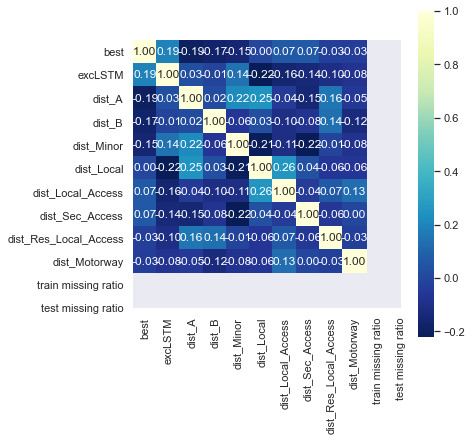

In [43]:
corr = loc_roads[col_corr].corr()
plt.figure(figsize = (6,6))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', cmap="YlGnBu_r", xticklabels=col_corr, yticklabels=col_corr)
plt.show();

#### Processing and adding categorical features

In [48]:
loc_excLSTM_select = loc_excLSTM[['excLSTM','dist_A','dist_B','dist_Minor',
                                 'dist_Local', 'dist_Local_Access', 'dist_Sec_Access', 
                                  'dist_Res_Local_Access', 'dist_Motorway',
                                  'train missing ratio','test missing ratio']]

#loc_excLSTM_select = pd.concat([loc_excLSTM_select, df_address], axis=1, join='inner')
loc_excLSTM_select = pd.concat([loc_excLSTM_select, df_supgrp], axis=1, join='inner')
#loc_excLSTM_select = pd.concat([loc_excLSTM_select, df_grp], axis=1, join='inner')
#loc_excLSTM_select = pd.concat([loc_excLSTM_select, df_subgrp], axis=1, join='inner')
#loc_excLSTM_select = pd.concat([loc_excLSTM_select, df_city], axis=1, join='inner')
#loc_excLSTM_select = pd.concat([loc_excLSTM_select, df_district], axis=1, join='inner')

#### Encoding 'BEST METHODS'

In [49]:
from sklearn import preprocessing

In [50]:
factor = pd.factorize(loc_excLSTM_select['excLSTM'])
loc_excLSTM_select['excLSTM'] = factor[0]
definitions = factor[1]

### Random Forest Classifer

In [74]:
from sklearn.metrics import accuracy_score, classification_report

In [79]:
y = loc_excLSTM_select['excLSTM']
x = loc_excLSTM_select.drop('excLSTM', axis =1)
X_tr, X_te, y_tr, y_te = train_test_split(x, y, test_size = 0.29, random_state=1)
rf = RandomForestClassifier(n_estimators = 10, 
                            criterion = 'entropy', 
                            max_depth = None,
                            random_state = 3, 
                            n_jobs = 1)
rf.fit(X_tr, y_tr)
y_tr_pred = rf.predict(X_tr)
y_te_pred = rf.predict(X_te)

train_accuracy = accuracy_score(y_tr,y_tr_pred)
test_accuracy = accuracy_score(y_te,y_te_pred)

print('train accuracy:' + str(train_accuracy))
print('test accuracy: ' + str(test_accuracy))

train accuracy:0.9487179487179487
test accuracy: 0.5625


<AxesSubplot:>

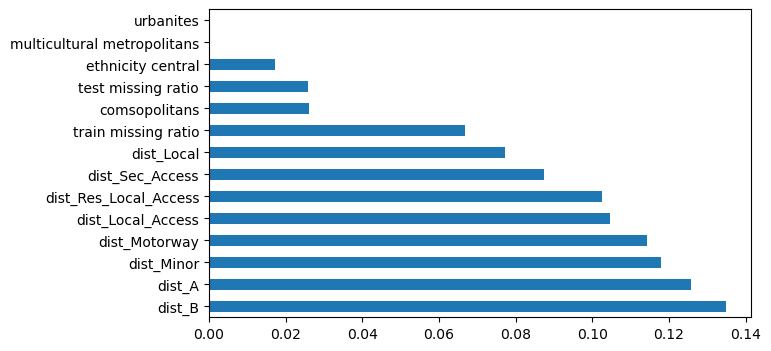

In [80]:
feat_imp = pd.Series(rf.feature_importances_, index = X_tr.columns)
feat_imp.nlargest(20).plot(kind = 'barh', figsize = (7,4))

### 2. Modelling Methods include LSTM

In [57]:
loc_LSTM = loc_roads.drop('excLSTM', axis = 1)
loc_LSTM = loc_LSTM[~loc_LSTM['best'].isin([' '])]
loc_LSTM = loc_LSTM.reset_index(drop=True)

#### Term document matrix for 'nearest_roads', 'address', 'city'

In [58]:
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
address = count_vectorizer.fit_transform(loc_LSTM['address'])
df_address = pd.DataFrame(address.toarray(), columns=count_vectorizer.get_feature_names())
print(df_address.shape)

(110, 243)


In [59]:
supgrp = count_vectorizer.fit_transform(loc_LSTM['SPRGRP'])
df_supgrp = pd.DataFrame(supgrp.toarray(), columns=count_vectorizer.get_feature_names())
print(df_supgrp.shape)

(110, 4)


In [60]:
grp = count_vectorizer.fit_transform(loc_LSTM['GRP'])
df_grp = pd.DataFrame(grp.toarray(), columns=count_vectorizer.get_feature_names())
print(df_grp.shape)

(110, 8)


In [61]:
city = count_vectorizer.fit_transform(loc_LSTM['city'])
df_city = pd.DataFrame(city.toarray(), columns=count_vectorizer.get_feature_names())
print(df_city.shape)

(110, 6)


In [62]:
district = count_vectorizer.fit_transform(loc_LSTM['DISTRICT'])
df_district = pd.DataFrame(district.toarray(), columns=count_vectorizer.get_feature_names())
print(df_district.shape)

(110, 18)


#### Processing and adding categorical features

In [63]:
loc_LSTM_select = loc_LSTM[['best','dist_A','dist_B','dist_Minor',
                                 'dist_Local', 'dist_Local_Access', 'dist_Sec_Access', 
                                  'dist_Res_Local_Access', 'dist_Motorway',
                            'train missing ratio','test missing ratio']]

#loc_LSTM_select = pd.concat([loc_LSTM_select, df_address], axis=1, join='inner')
loc_LSTM_select = pd.concat([loc_LSTM_select, df_supgrp], axis=1, join='inner')
#loc_LSTM_select = pd.concat([loc_LSTM_select, df_grp], axis=1, join='inner')
#loc_LSTM_select = pd.concat([loc_LSTM_select, df_city], axis=1, join='inner')
#loc_LSTM_select = pd.concat([loc_LSTM_select, df_district], axis=1, join='inner')

#### Encoding 'BEST METHODS'

In [64]:
factor = pd.factorize(loc_LSTM_select['best'])
loc_LSTM_select['best'] = factor[0]
definitions = factor[1]

### Random Forest Classifer

In [81]:
y = loc_LSTM_select['best']
x = loc_LSTM_select.drop('best', axis =1)
X_tr, X_te, y_tr, y_te = train_test_split(x, y, test_size = 0.25, random_state=5)
rf = RandomForestClassifier(n_estimators = 10, 
                            criterion = 'entropy', 
                            max_depth = None,
                            random_state = 3, 
                            n_jobs = 1)
rf.fit(X_tr, y_tr)
y_tr_pred = rf.predict(X_tr)
y_te_pred = rf.predict(X_te)

train_accuracy = accuracy_score(y_tr,y_tr_pred)
test_accuracy = accuracy_score(y_te,y_te_pred)

print('train accuracy:' + str(train_accuracy))
print('test accuracy: ' + str(test_accuracy))

train accuracy:0.975609756097561
test accuracy: 0.6071428571428571


<AxesSubplot:>

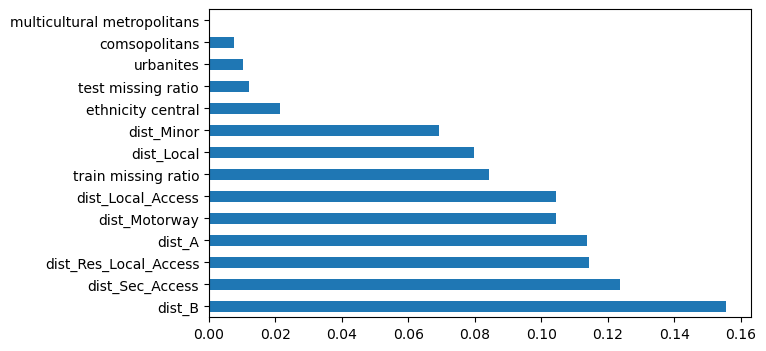

In [82]:
feat_imp = pd.Series(rf.feature_importances_, index = X_tr.columns)
feat_imp.nlargest(20).plot(kind = 'barh', figsize = (7,4))